# Exercise 2 - Logistic Regression

## Load the data...

In [2]:
data = load('ex2data1.txt')

data =

   34.62366   78.02469    0.00000
   30.28671   43.89500    0.00000
   35.84741   72.90220    0.00000
   60.18260   86.30855    1.00000
   79.03274   75.34438    1.00000
   45.08328   56.31637    0.00000
   61.10666   96.51143    1.00000
   75.02475   46.55401    1.00000
   76.09879   87.42057    1.00000
   84.43282   43.53339    1.00000
   95.86156   38.22528    0.00000
   75.01366   30.60326    0.00000
   82.30705   76.48196    1.00000
   69.36459   97.71869    1.00000
   39.53834   76.03681    0.00000
   53.97105   89.20735    1.00000
   69.07014   52.74047    1.00000
   67.94686   46.67857    0.00000
   70.66151   92.92714    1.00000
   76.97878   47.57596    1.00000
   67.37203   42.83844    0.00000
   89.67678   65.79937    1.00000
   50.53479   48.85581    0.00000
   34.21206   44.20953    0.00000
   77.92409   68.97236    1.00000
   62.27101   69.95446    1.00000
   80.19018   44.82163    1.00000
   93.11439   38.80067    0.00000
   61.83021   50.25611    0.00000
   38.

### Separate the training data from what we want to predict...

In [3]:
X = data(:, [1,2]);
y = data(:, 3);

In [3]:
X(:,2)

ans =

   78.025
   43.895
   72.902
   86.309
   75.344
   56.316
   96.511
   46.554
   87.421
   43.533
   38.225
   30.603
   76.482
   97.719
   76.037
   89.207
   52.740
   46.679
   92.927
   47.576
   42.838
   65.799
   48.856
   44.210
   68.972
   69.954
   44.822
   38.801
   50.256
   64.996
   72.808
   57.052
   63.128
   69.433
   71.168
   52.214
   98.869
   80.908
   41.573
   75.238
   56.308
   46.856
   65.569
   40.618
   45.823
   52.061
   70.458
   86.728
   96.769
   88.696
   74.163
   60.999
   43.391
   60.396
   49.805
   59.809
   68.862
   95.599
   69.825
   78.454
   85.760
   47.021
   39.261
   49.593
   66.450
   41.092
   97.535
   51.883
   92.116
   60.991
   43.307
   78.032
   96.228
   73.095
   75.858
   72.369
   88.476
   75.810
   42.508
   42.720
   69.804
   45.694
   66.589
   59.514
   90.960
   85.594
   78.845
   90.425
   96.647
   60.770
   77.159
   87.509
   35.571
   84.845
   45.358
   48.380
   87.104
   68.775
   64.932
   

### Visualize the data before working with it...

In [5]:
help plot

'plot' is a function from the file /usr/local/octave/3.8.0/share/octave/3.8.0/m/plot/draw/plot.m

 -- Function File: plot (Y)
 -- Function File: plot (X, Y)
 -- Function File: plot (X, Y, FMT)
 -- Function File: plot (..., PROPERTY, VALUE, ...)
 -- Function File: plot (X1, Y1, ..., XN, YN)
 -- Function File: plot (HAX, ...)
 -- Function File: H = plot (...)
     Produce 2-D plots.

     Many different combinations of arguments are possible.  The
     simplest form is

          plot (Y)

     where the argument is taken as the set of Y coordinates and the X
     coordinates are taken to be the range '1:numel (Y)'.

     If more than one argument is given, they are interpreted as

          plot (Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, FMT, ...)

     and so on.  Any number of argument sets may appear.  The X and Y
     values are interpreted as follows:

        * If a single data argument is supplied, it is taken a

In [7]:
find(y==0)

ans =

    1
    2
    3
    6
   11
   12
   15
   18
   21
   23
   24
   28
   29
   30
   33
   35
   36
   37
   39
   40
   42
   44
   45
   46
   54
   55
   56
   58
   62
   63
   64
   65
   66
   68
   71
   79
   80
   87
   90
   93



In [9]:
X((:,1) find(y==0))

parse error:

  syntax error

>>> X((:,1) find(y==0))
       ^



In [20]:
help plot

'plot' is a function from the file /usr/local/octave/3.8.0/share/octave/3.8.0/m/plot/draw/plot.m

 -- Function File: plot (Y)
 -- Function File: plot (X, Y)
 -- Function File: plot (X, Y, FMT)
 -- Function File: plot (..., PROPERTY, VALUE, ...)
 -- Function File: plot (X1, Y1, ..., XN, YN)
 -- Function File: plot (HAX, ...)
 -- Function File: H = plot (...)
     Produce 2-D plots.

     Many different combinations of arguments are possible.  The
     simplest form is

          plot (Y)

     where the argument is taken as the set of Y coordinates and the X
     coordinates are taken to be the range '1:numel (Y)'.

     If more than one argument is given, they are interpreted as

          plot (Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, FMT, ...)

     and so on.  Any number of argument sets may appear.  The X and Y
     values are interpreted as follows:

        * If a single data argument is supplied, it is taken a

## Plot...

In [35]:
function plotData(X,y)
   
   #get the row indices where y = 1 
   positive = find(y==1);
   
   #get the row indices where y = 0
   negative = find(y==0);
   
   plot(X(positive,1),X(positive,2),'k+','LineWidth',2,'MarkerSize',7);
   hold on;
   plot(X(negative,1),X(negative,2),'ko','MarkerFaceColor','y','MarkerSize',7);
   xlabel("Exam 1 score");
   ylabel("Exam 2 score");
   legend('Admitted','Not admitted')
end

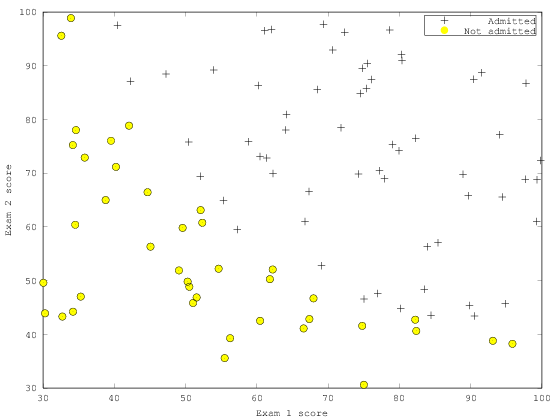

In [36]:
plotData(X,y)

## Sigmoid Function...

### Defined as $g(z) = \frac{1}{1 + e^{-z}}$

In [4]:
function g = sigmoid(z)

   g = zeros(size(z));
   g = 1./(1 + exp(-z));

end

In [5]:
sigmoid(0)

ans =  0.50000


In [39]:
sigmoid(1)

ans =  0.73106


In [40]:
sigmoid(10)

ans =  0.99995


In [41]:
sigmoid(12)

ans =  0.99999


In [42]:
sigmoid(20)

ans =  1.00000


In [43]:
sigmoid(30)

ans =  1.00000


In [44]:
sigmoid(100)

ans =  1


In [45]:
sigmoid(1000)

ans =  1


In [46]:
sigmoid(-5)

ans =  0.0066929


In [47]:
sigmoid(-.5)

ans =  0.37754


In [48]:
sigmoid(-100)

ans =    3.7201e-44


In [49]:
sigmoid(-1000)

ans = 0


In [50]:
sigmoid(-1)

ans =  0.26894


## Cost Function...

### Non-regularized version with the ```-``` distributed:
$J(\theta) = \frac{1}{m}\displaystyle\sum_{i=1}^{m}\Bigg[-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))\Bigg]$

### Vectorized:
$J(\theta) = \frac{1}{m}\cdot\Big(-y^T log(h) - (1 - y)^T log(1 - h)\Big)$

## Gradient Descent...

### Non-regularized version (same as with linear regression):

$\theta_j := \theta_j - \alpha\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j$

### Vectorized:

$\theta_j := \theta_j - \frac{\alpha}{m}X^T(g(X\theta) - \overrightarrow{y})$

### Non-vectorized partial derivative of $J(\theta)$ which you use for returning the gradient elements if will be using the ```fminunc``` Octave function (See LogisticRegression (Week 3) notebook under *Advanced Optimization* for more):

$\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\displaystyle\sum_{i=1}^{m}\Big(h_\theta(x^{(i)}) - y^{(i)}\Big)x_j^{(i)}$

### Vectorized partial derivative of $J(\theta)$ which we're using below:

$\nabla J(\theta) = \frac{1}{m}\cdot X^T\cdot(g(X\cdot\theta) - \overrightarrow{y})$



In [69]:
function [J, gradient] = costFunction(theta, X, y)
   m = length(y); #number of training samples
   J = 0;
   gradient = zeros(size(theta));
   
   h = sigmoid(X * theta);
   
   #vectorized cost function
   J = ((-y' * log(h)) - ((1-y)' * log(1-h)))/m;
   
   #gradient descent
   errors = (h-y);
   errorsMatrix = X'*errors;
   thetaNew = (1/m)*errorsMatrix;
   gradient = thetaNew;

end

### Debugging...

In [58]:
h = sigmoid(X * initial_theta);
errors = h-y;
errorsMatrix = X'*errors;
m = length(y);
thetaNew = (1/m)*errorsMatrix

errorsMatrix =

    -10.000
  -1200.922
  -1126.284

thetaNew =

   -0.10000
  -12.00922
  -11.26284



In [6]:
[m,n] = size(X)

m =  100
n =  2


### Add a feature for the intercept or $\theta_0$ feature...

In [7]:
X = [ones(m,1) X]

X =

    1.0000   34.6237   78.0247
    1.0000   30.2867   43.8950
    1.0000   35.8474   72.9022
    1.0000   60.1826   86.3086
    1.0000   79.0327   75.3444
    1.0000   45.0833   56.3164
    1.0000   61.1067   96.5114
    1.0000   75.0247   46.5540
    1.0000   76.0988   87.4206
    1.0000   84.4328   43.5334
    1.0000   95.8616   38.2253
    1.0000   75.0137   30.6033
    1.0000   82.3071   76.4820
    1.0000   69.3646   97.7187
    1.0000   39.5383   76.0368
    1.0000   53.9711   89.2074
    1.0000   69.0701   52.7405
    1.0000   67.9469   46.6786
    1.0000   70.6615   92.9271
    1.0000   76.9788   47.5760
    1.0000   67.3720   42.8384
    1.0000   89.6768   65.7994
    1.0000   50.5348   48.8558
    1.0000   34.2121   44.2095
    1.0000   77.9241   68.9724
    1.0000   62.2710   69.9545
    1.0000   80.1902   44.8216
    1.0000   93.1144   38.8007
    1.0000   61.8302   50.2561
    1.0000   38.7858   64.9957
    1.0000   61.3793   72.8079
    1.0000   85.4045   57.0520
   

In [8]:
initial_theta = zeros(n+1,1);
size(initial_theta)

ans =

   3   1



In [63]:
size(y)
size(X)

ans =

   100     1

ans =

   100     3



In [60]:
[J, gradient] = costFunction(initial_theta, X, y);

In [61]:
J

J =  0.69315


In [62]:
gradient

gradient =

   -0.10000
  -12.00922
  -11.26284



In [47]:
theta

error: 'theta' undefined near line 1 column 1


In [48]:
initial_theta

initial_theta =

   0
   0
   0



## Call ```fminunc``` (again, see Logistic Regression Week 3 Notebook under ***Advanced Optimization*** or ex2.pdf for more)...

In [63]:
options = optimset('GradObj','on','MaxIter',400);
[theta,cost] = fminunc(@(t) (costFunction(t,X,y)),initial_theta,options);

In [64]:
cost

cost =  0.20350


In [65]:
theta

theta =

  -25.16127
    0.20623
    0.20147



### Use the optimal theta to predict against a test observation...

In [67]:
x = [1 45 85];
prediction = sigmoid(x*theta)

prediction =  0.77629


### The probability of a student getting admitted to the university with these exam grades is 77.6%

TODO:  

- Review plotDecisionBoundary.m for how the decision boundary is plotted
- How do they compute the +/- error of .002 as shown in ex2.m?